In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [11]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish_D2_I7000_F9000/TPath_500_finish_data_D2.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.000,-0.00200,500,7000,9000,669.05
1,0.000,-0.00198,500,7000,9000,682.81
2,0.000,-0.00196,500,7000,9000,696.80
3,0.000,-0.00194,500,7000,9000,710.67
4,0.000,-0.00192,500,7000,9000,724.42
...,...,...,...,...,...,...
30329,0.003,0.00188,500,7000,9000,856.27
30330,0.003,0.00190,500,7000,9000,856.00
30331,0.003,0.00196,500,7000,9000,516.32
30332,0.003,0.00198,500,7000,9000,515.74


In [7]:
df = data.drop(data.columns[2:5], axis=1)
df

,X-Koordinate,Y-Koordinate,Temperatur
0,0.000,-0.00200,532.25
1,0.000,-0.00198,540.69
2,0.000,-0.00196,549.09
3,0.000,-0.00194,557.38
4,0.000,-0.00192,565.57
...,...,...,...
30329,0.003,0.00188,653.16
30330,0.003,0.00190,653.16
30331,0.003,0.00196,422.17
30332,0.003,0.00198,421.90


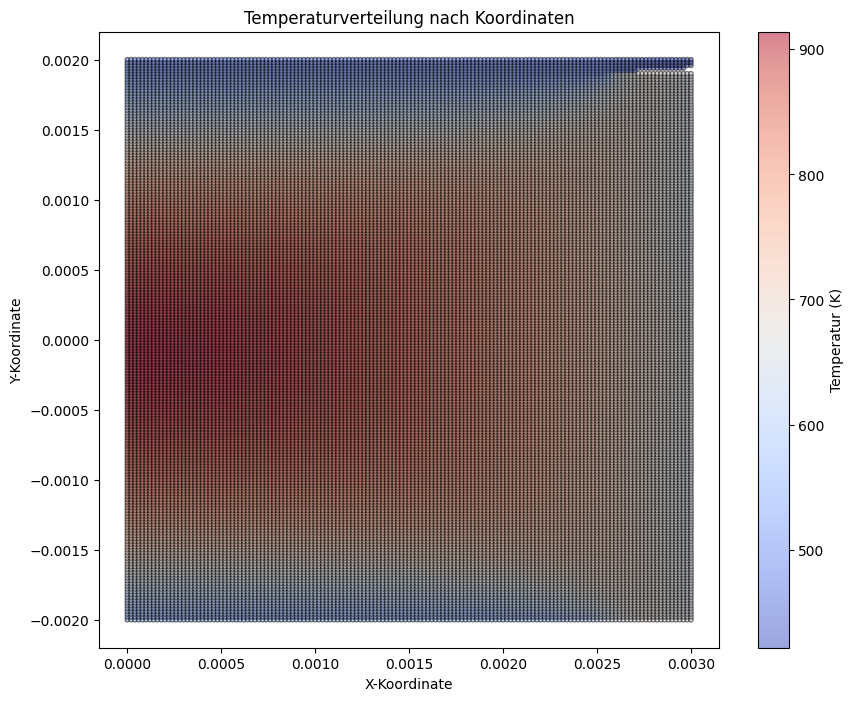

In [8]:
x = df['X-Koordinate']
y = df['Y-Koordinate']  # Y-Koordinaten
temperature = df['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.5, s=10)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Temperaturverteilung nach Koordinaten')
plt.grid(False)  # Gitterlinien ausblenden

plt.show()

In [9]:
gefilterte_werte = df[(df['X-Koordinate'] >= 0.0025) & (df['X-Koordinate'] <= 0.003)]
df_werte = gefilterte_werte
print(gefilterte_werte)


       X-Koordinate  Y-Koordinate  Temperatur
25125        0.0025      -0.00200      596.94
25126        0.0025      -0.00198      608.76
25127        0.0025      -0.00196      621.42
25128        0.0025      -0.00194      632.52
25129        0.0025      -0.00192      642.07
...             ...           ...         ...
30329        0.0030       0.00188      653.16
30330        0.0030       0.00190      653.16
30331        0.0030       0.00196      422.17
30332        0.0030       0.00198      421.90
30333        0.0030       0.00200      421.60

[5209 rows x 3 columns]


In [10]:
df_werte = gefilterte_werte[(gefilterte_werte['Y-Koordinate'] >= 0.0015) & (gefilterte_werte['Y-Koordinate'] <= 0.002)]
print(df_werte)

       X-Koordinate  Y-Koordinate  Temperatur
25300        0.0025       0.00150      698.50
25301        0.0025       0.00152      695.66
25302        0.0025       0.00154      692.52
25303        0.0025       0.00156      689.06
25304        0.0025       0.00158      685.27
...             ...           ...         ...
30329        0.0030       0.00188      653.16
30330        0.0030       0.00190      653.16
30331        0.0030       0.00196      422.17
30332        0.0030       0.00198      421.90
30333        0.0030       0.00200      421.60

[659 rows x 3 columns]


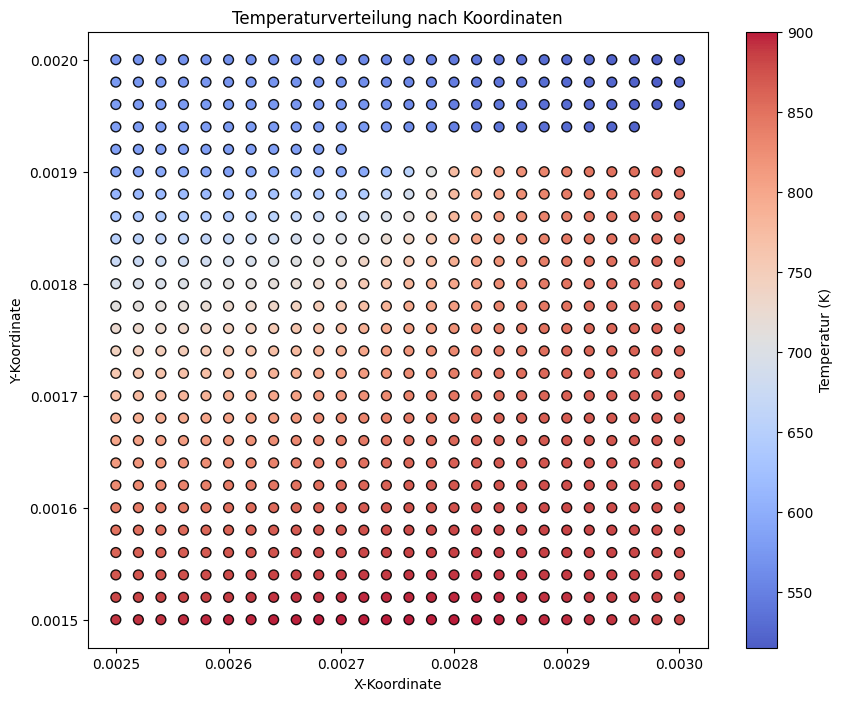

In [15]:
x = df_werte['X-Koordinate']
y = df_werte['Y-Koordinate']  # Y-Koordinaten
temperature = df_werte['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.9, s= 50)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Temperaturverteilung nach Koordinaten')
plt.grid(False)  # Gitterlinien ausblenden

plt.show()

In [8]:
df_werte1 = df_werte[df_werte['Y-Koordinate']> 0.0018]
print(df_werte[df_werte['Y-Koordinate'] == 0.0018])

        X-Koordinate  Y-Koordinate  Temperatur
100630       0.00250        0.0018      691.47
101031       0.00251        0.0018      691.92
101432       0.00252        0.0018      692.68
101833       0.00253        0.0018      693.75
102234       0.00254        0.0018      695.14
102635       0.00255        0.0018      696.84
103036       0.00256        0.0018      698.85
103437       0.00257        0.0018      701.17
103838       0.00258        0.0018      703.81
104239       0.00259        0.0018      706.76
104640       0.00260        0.0018      710.02
105041       0.00261        0.0018      710.70
105442       0.00262        0.0018      711.89
105843       0.00263        0.0018      713.60
106244       0.00264        0.0018      715.82
106645       0.00265        0.0018      718.56
107046       0.00266        0.0018      721.83
107447       0.00267        0.0018      725.60
107848       0.00268        0.0018      729.90
108249       0.00269        0.0018      734.71
108650       

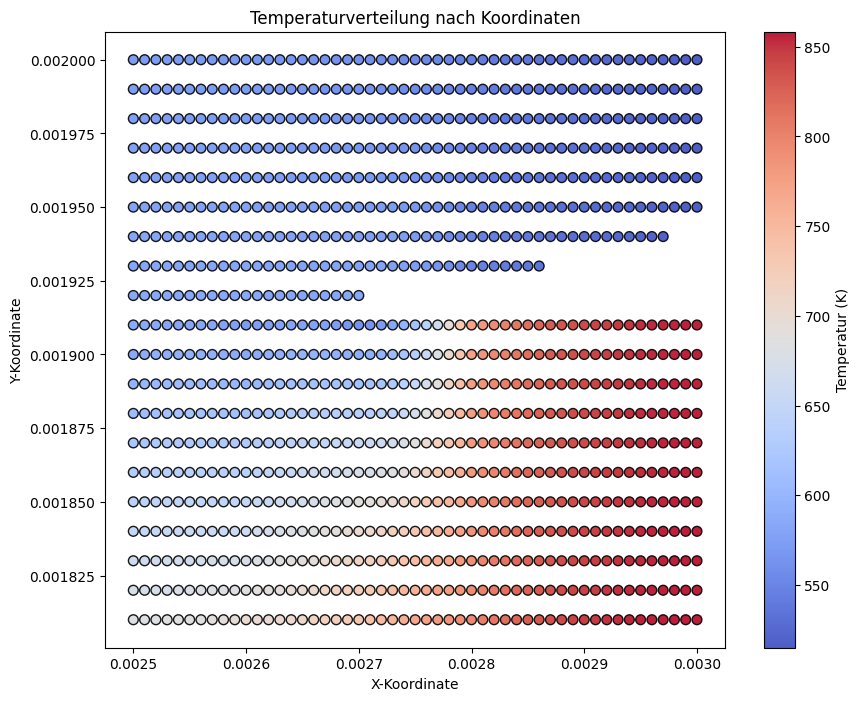

In [9]:
x = df_werte1['X-Koordinate']
y = df_werte1['Y-Koordinate']  # Y-Koordinaten
temperature = df_werte1['Temperatur']  # Temperaturwerte

# Erstellen des Plots
plt.figure(figsize=(10, 8))
sc = plt.scatter(x, y, c=temperature, cmap='coolwarm', edgecolor='k', alpha=0.9, s= 50)
plt.colorbar(sc, label='Temperatur (K)')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.title('Temperaturverteilung nach Koordinaten')
plt.grid(False)  # Gitterlinien ausblenden

plt.show()

In [89]:
a1 = df_werte1[df_werte1['Y-Koordinate'] == 0.00200]
print(df_werte1[df_werte1['Y-Koordinate'] == 0.00200])

      X-Koordinate  Y-Koordinate  Temperatur
6463       0.00252         0.002      363.04
6564       0.00256         0.002      360.16
6665       0.00260         0.002      357.59
6766       0.00264         0.002      355.28
6867       0.00268         0.002      353.18
6967       0.00272         0.002      351.28
7067       0.00276         0.002      349.54
7167       0.00280         0.002      347.94
7267       0.00284         0.002      346.48
7367       0.00288         0.002      345.13
7467       0.00292         0.002      343.89
7567       0.00296         0.002      342.75
7667       0.00300         0.002      341.71


In [90]:
a2 = df_werte1[df_werte1['Y-Koordinate'] == 0.00196]
print(df_werte1[df_werte1['Y-Koordinate'] == 0.00196])


      X-Koordinate  Y-Koordinate  Temperatur
6462       0.00252       0.00196      364.22
6563       0.00256       0.00196      360.99
6664       0.00260       0.00196      358.23
6765       0.00264       0.00196      355.78
6866       0.00268       0.00196      353.58
6966       0.00272       0.00196      351.61
7066       0.00276       0.00196      349.82
7166       0.00280       0.00196      348.19
7266       0.00284       0.00196      346.69
7366       0.00288       0.00196      345.32
7466       0.00292       0.00196      344.09
7566       0.00296       0.00196      342.97
7666       0.00300       0.00196      341.96


In [91]:
a = a1['Temperatur'].iloc[0] - a2['Temperatur'].iloc[0]
print(a)


-1.1800000000000068


Test für Git